In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Copie du jeu de données dans colaboratory
cp /content/drive/My\ Drive/Database.zip /

In [0]:
import os
import zipfile
import pathlib
#Décompression du dataset
local_zip = '/Database.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

In [0]:
ll /Database/

total 20
drwxr-xr-x 4 root 4096 Jan 22 05:19 BaseDApprentissage/
drwxr-xr-x 4 root 4096 Jan 22 05:18 BaseDeTest/
-rw-r--r-- 1 root 1645 Jan 22 05:20 Readme-HOG.txt
-rw-r--r-- 1 root  881 Jan 22 05:18 Readme-readTrafficSigns.txt
-rw-r--r-- 1 root 1391 Jan 22 05:18 readTrafficSigns.py


In [0]:
ll /Database/BaseDApprentissage/Training_HOG/HOG/HOG_02/

total 1540
drwxr-xr-x 2 root 12288 Jan 22 05:19 00000/
drwxr-xr-x 2 root 73728 Jan 22 05:19 00001/
drwxr-xr-x 2 root 73728 Jan 22 05:19 00002/
drwxr-xr-x 2 root 61440 Jan 22 05:19 00003/
drwxr-xr-x 2 root 69632 Jan 22 05:19 00004/
drwxr-xr-x 2 root 69632 Jan 22 05:19 00005/
drwxr-xr-x 2 root 20480 Jan 22 05:19 00006/
drwxr-xr-x 2 root 57344 Jan 22 05:19 00007/
drwxr-xr-x 2 root 61440 Jan 22 05:19 00008/
drwxr-xr-x 2 root 65536 Jan 22 05:19 00009/
drwxr-xr-x 2 root 69632 Jan 22 05:19 00010/
drwxr-xr-x 2 root 49152 Jan 22 05:19 00011/
drwxr-xr-x 2 root 69632 Jan 22 05:19 00012/
drwxr-xr-x 2 root 69632 Jan 22 05:19 00013/
drwxr-xr-x 2 root 36864 Jan 22 05:19 00014/
drwxr-xr-x 2 root 20480 Jan 22 05:19 00015/
drwxr-xr-x 2 root 20480 Jan 22 05:19 00016/
drwxr-xr-x 2 root 36864 Jan 22 05:19 00017/
drwxr-xr-x 2 root 36864 Jan 22 05:19 00018/
drwxr-xr-x 2 root 12288 Jan 22 05:19 00019/
drwxr-xr-x 2 root 20480 Jan 22 05:19 00020/
drwxr-xr-x 2 root 12288 Jan 22 05:19 00021/
drwxr-xr-x 2 root 204

In [0]:

import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data
# returns: create a csv file of HoG images features

def readTrafficSignsTrain(rootpath):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data
    Returns:   Create a csv file of HoG images features'''
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open('GT-Classes/GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file

        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            file_name = row[0][:-4] #remove .ppm in the image name
            f_open = open(prefix + file_name+ '.txt', 'r')#Open txt file
            lines = f_open.read().strip().split('\n') #read all lines in the file and split
            #lines contains all features HoG of an image
            img_feateares=''
            #We loop over lines to obtain one row in csv file
            for one_feateare in lines:
              img_feateares=img_feateares+one_feateare+';'
            img_feateares=img_feateares+row[7]+'\n' ## the 8th column is the label
            #Open the data.csv file and write the new image features
            fichier = open("data.csv", "a")
            fichier.write(img_feateares)
            fichier.close()
        gtFile.close()
    print("End build csv file")

In [0]:
file_path = '/Database/BaseDApprentissage/Training_HOG/HOG/HOG_02/'
readTrafficSignsTrain(file_path)#Création du fichier data.csv

End build csv file


In [0]:
import pandas as pd
df = pd.read_csv('data.csv', header=None, sep=';')#lecture du fichier créé (data.csv)
df.head()#Visualisation des 5 premièrs feautures des images

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
0,0.084114,0.012509,0.001139,0.041691,0.443293,0.033574,0.000213,0.010892,0.125005,0.072376,0.006039,0.044455,0.435786,0.064728,0.045807,0.058674,0.192964,0.040823,0.038744,0.142044,0.480704,0.036586,0.000000,0.022930,0.158162,0.085586,0.153284,0.293540,0.280026,0.076133,0.047578,0.035619,0.077658,0.054524,0.005042,0.018028,0.183104,0.106162,0.300339,0.111019,...,0.273770,0.121657,0.041059,0.036930,0.023378,0.026503,0.107648,0.139748,0.116941,0.124062,0.126452,0.031412,0.021391,0.006922,0.123032,0.129536,0.037063,0.046783,0.199411,0.219173,0.077214,0.024341,0.322829,0.072914,0.124794,0.115124,0.044732,0.049051,0.176152,0.042140,0.019567,0.044634,0.040081,0.042722,0.191935,0.371952,0.554959,0.071317,0.004744,0
1,0.042234,0.010996,0.000139,0.106656,0.431576,0.061183,0.000412,0.003250,0.077768,0.008534,0.000000,0.086742,0.439469,0.183968,0.077223,0.073741,0.176993,0.093957,0.041302,0.126331,0.443958,0.081025,0.000675,0.009133,0.186166,0.049147,0.087735,0.211209,0.238184,0.098414,0.239765,0.145102,0.022401,0.005190,0.000000,0.022031,0.126784,0.321207,0.208654,0.058249,...,0.098019,0.091205,0.108165,0.094924,0.007133,0.011339,0.061859,0.107373,0.025088,0.098446,0.102204,0.018499,0.000565,0.001575,0.365358,0.229380,0.015146,0.051255,0.083766,0.014316,0.000000,0.007598,0.652584,0.152075,0.047889,0.123778,0.085205,0.021854,0.017265,0.011444,0.050590,0.076776,0.023667,0.071095,0.219338,0.295188,0.125168,0.012118,0.143777,0
2,0.089617,0.080208,0.011471,0.053661,0.466442,0.026843,0.000000,0.016241,0.090332,0.085860,0.020544,0.041616,0.324918,0.101294,0.150956,0.090461,0.125183,0.089280,0.099953,0.203604,0.490225,0.030246,0.000000,0.025518,0.066473,0.128870,0.188204,0.233248,0.112596,0.289057,0.160155,0.036808,0.033466,0.014653,0.005625,0.008893,0.115329,0.241982,0.330389,0.080242,...,0.099684,0.036196,0.315712,0.131383,0.000000,0.000125,0.036367,0.081836,0.015582,0.027465,0.089598,0.036550,0.000000,0.016871,0.406918,0.222173,0.027702,0.040895,0.037954,0.004202,0.000000,0.024044,0.686508,0.204959,0.052816,0.057286,0.140188,0.045719,0.001459,0.004172,0.060764,0.161974,0.055433,0.087877,0.135764,0.116282,0.047458,0.018792,0.205772,0
3,0.124598,0.086021,0.008510,0.063973,0.390833,0.040249,0.014065,0.025400,0.088090,0.055588,0.012765,0.073985,0.197069,0.175948,0.267033,0.055208,0.115622,0.098738,0.167282,0.245788,0.429261,0.018997,0.016764,0.019955,0.045030,0.104228,0.227389,0.144581,0.048101,0.356929,0.311427,0.020584,0.016311,0.003543,0.002399,0.020217,0.079115,0.342116,0.357136,0.023378,...,0.086825,0.114661,0.291040,0.117610,0.000282,0.007663,0.101296,0.059343,0.014748,0.017197,0.060911,0.007945,0.000368,0.025109,0.466666,0.140878,0.009753,0.013572,0.019532,0.000000,0.013675,0.059308,0.676282,0.041870,0.089205,0.064391,0.135832,0.016529,0.001064,0.005590,0.133640,0.058513,0.068571,0.088442,0.114209,0.075747,0.019348,0.007773,0.336546,0
4,0.109809,0.049416,0.000206,0.034962,0.428900,0.045921,0.001986,0.013491,0.193928,0.070295,0.017230,0.088495,0.334584,0.048942,0.020809,0.038173,0.154890,0.041355,0.012564,0.086536,0.462236,0.052928,0.007944,0.018456,0.100333,0.120207,0.266226,0.289594,0.389719,0.055159,0.030201,0.011018,0.161546,0.027468,0.029685,0.087095,0.151991,0.127132,0.166441,0.100937,...,0.018025,0.041075,0.168102,0.051055,0.002203,0.031068,0.124340,0.236702,0.018377,0.004290,0.007833,0.005589,0.003926,0.048045,0.515131,0.219238,0.123248,0.017909,0.023501,0.009108,0.002287,0.053326,0.427298,0.030839,0.006291,0.010453,0.115986,0.069219,0.000064,0.047431,0.237433,0.049901,0.012061,0.019783,0.103546,0.041708,0.000727,0.108621,0.482985,0


In [0]:
df.shape

(39209, 1569)

In [0]:
import pickle
with open('drive/My Drive/Colab Notebooks/Datasets/data.pd', 'wb') as handle:
    pickle.dump(df, handle)

In [0]:


import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data
# returns: create a csv file of HoG images features

def readTrafficSignsTest(rootpath):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data
    Returns:   create a csv file of HoG images features'''
    prefix = rootpath + '/'
    gtFile = open('Test_VeriteTerrain(GT).csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file

    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        file_name = row[0][:-4] #remove .ppm in the image name
        f_open = open(prefix + file_name+ '.txt', 'r')
        feateares = f_open.read().strip().split('\n')
        img_feateares=''
        for one_feateare in feateares:
          img_feateares=img_feateares+one_feateare+';'
        img_feateares=img_feateares+row[7]+'\n'# the 8th column is the label
        fichier = open("test.csv", "a")
        fichier.write(img_feateares)
        fichier.close()
    gtFile.close()
    print("End build csv file")

In [0]:
file_path = '/Database/BaseDeTest/Test_HOG/HOG_02'
readTrafficSignsTest(file_path)

End build csv file


In [0]:
import pandas as pd
df_test = pd.read_csv('test.csv', header=None, sep=';')
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
0,0.077112,0.049983,0.143680,0.151308,0.038555,0.082894,0.166349,0.090185,0.104188,0.100738,0.215535,0.177288,0.055930,0.063975,0.099278,0.140718,0.171471,0.095544,0.120509,0.089032,0.036453,0.142469,0.134749,0.060350,0.377701,0.265219,0.163308,0.141554,0.073729,0.074374,0.126787,0.103715,0.012444,0.019049,0.027556,0.022371,0.007593,0.003344,0.002644,0.012993,...,0.008126,0.006722,0.007335,0.091184,0.063797,0.015779,0.001250,0.039124,0.086540,0.075368,0.019438,0.473649,0.637056,0.015327,0.012919,0.106883,0.143415,0.087703,0.025112,0.024885,0.038218,0.010486,0.024725,0.047442,0.106276,0.083919,0.047099,0.069653,0.105911,0.030990,0.009593,0.095782,0.164022,0.101219,0.056227,0.084591,0.029830,0.006890,0.018699,16
1,0.119052,0.003266,0.006143,0.247642,0.188298,0.013261,0.002400,0.108383,0.101999,0.017423,0.004926,0.266080,0.295208,0.013048,0.001328,0.153389,0.315290,0.023825,0.031323,0.182069,0.206065,0.010951,0.001659,0.334060,0.274764,0.048709,0.029293,0.129379,0.185493,0.116980,0.092102,0.378674,0.030642,0.017596,0.008270,0.133062,0.142838,0.001929,0.001568,0.045484,...,0.127043,0.037253,0.057937,0.097563,0.026142,0.007395,0.014669,0.395792,0.390840,0.049571,0.127127,0.142368,0.036735,0.011474,0.079633,0.178549,0.028302,0.073083,0.214105,0.096671,0.023134,0.032192,0.427316,0.047514,0.076725,0.060989,0.167363,0.246273,0.067284,0.031518,0.025786,0.002323,0.026539,0.213288,0.317063,0.171908,0.053293,0.022978,0.010473,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.309462,0.351681,0.000060,0.010713,0.148502,0.104254,0.000000,0.000000,0.208257,0.217466,0.001007,0.000000,0.000000,0.000000,0.000000,0.000000,0.393222,0.447801,0.000000,0.006520,0.130205,0.177812,0.010616,0.022378,0.261561,0.278857,0.001151,0.004384,0.069356,0.060222,0.000000,0.000000,0.127693,0.179755,0.001161,...,0.452165,0.447671,0.033033,0.023920,0.003452,0.000924,0.004349,0.018030,0.385495,0.312827,0.000000,0.000529,0.005570,0.008301,0.006485,0.021533,0.157817,0.107365,0.000000,0.013324,0.134879,0.064517,0.048551,0.002916,0.430287,0.472690,0.000000,0.000000,0.024807,0.012307,0.000395,0.000000,0.208758,0.179007,0.000000,0.042548,0.374231,0.062075,0.001808,38
3,0.026402,0.036410,0.091313,0.107078,0.079168,0.111932,0.039147,0.007433,0.013309,0.009527,0.015879,0.080135,0.295904,0.388529,0.182774,0.070541,0.002436,0.003864,0.142704,0.374793,0.298518,0.097773,0.009539,0.000000,0.002447,0.001580,0.013639,0.375906,0.408877,0.203929,0.106511,0.110688,0.001214,0.000088,0.004111,0.062549,0.253033,0.245725,0.326384,0.126469,...,0.055659,0.358907,0.129007,0.031768,0.097295,0.092958,0.141710,0.100115,0.028620,0.058216,0.096667,0.100782,0.203848,0.138290,0.172493,0.236578,0.049182,0.052278,0.102717,0.179673,0.180185,0.098016,0.322441,0.111612,0.068713,0.170322,0.070401,0.027510,0.046111,0.089039,0.199487,0.152112,0.166327,0.176707,0.011758,0.122038,0.548236,0.144410,0.222143,33
4,0.042312,0.139276,0.093038,0.039349,0.156275,0.304959,0.044027,0.028507,0.119267,0.188071,0.210651,0.100037,0.233653,0.214910,0.048232,0.048967,0.040066,0.103603,0.094565,0.185819,0.251838,0.203746,0.092921,0.043589,0.067133,0.133992,0.182767,0.194022,0.281615,0.329073,0.073014,0.047348,0.077590,0.085849,0.133501,0.119353,0.183468,0.094354,0.038752,0.026333,...,0.018236,0.153695,0.251007,0.055598,0.035857,0.148731,0.430347,0.066502,0.136286,0.167263,0.223180,0.046610,0.197649,0.136416,0.073898,0.016792,0.327745,0.350210,0.064759,0.044657,0.210486,0.139218,0.000000,0.139371,0.108506,0.138796,0.287241,0.080108,0.081362,0.097460,0.274602,0.149952,0.372411,0.133690,0.149661,0.089199,0.088972,0.045503,0.046976,11


In [0]:
df_test.shape

(12630, 1569)

In [0]:
import pickle
with open('drive/My Drive/Colab Notebooks/Datasets/test.pd', 'wb') as handle:
    pickle.dump(df_test, handle)

In [0]:
#Chargement des donnée dumpé avec pickle
#Nous avons dumpé des pandas dataframe
import pickle

with open('drive/My Drive/Colab Notebooks/Datasets/data.pd', 'rb') as handle:
    df = pickle.load(handle)

with open('drive/My Drive/Colab Notebooks/Datasets/test.pd', 'rb') as handle:
    df_test = pickle.load(handle)    

In [0]:
print(df.shape)
df.head()

(39209, 1569)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
0,0.084114,0.012509,0.001139,0.041691,0.443293,0.033574,0.000213,0.010892,0.125005,0.072376,0.006039,0.044455,0.435786,0.064728,0.045807,0.058674,0.192964,0.040823,0.038744,0.142044,0.480704,0.036586,0.000000,0.022930,0.158162,0.085586,0.153284,0.293540,0.280026,0.076133,0.047578,0.035619,0.077658,0.054524,0.005042,0.018028,0.183104,0.106162,0.300339,0.111019,...,0.273770,0.121657,0.041059,0.036930,0.023378,0.026503,0.107648,0.139748,0.116941,0.124062,0.126452,0.031412,0.021391,0.006922,0.123032,0.129536,0.037063,0.046783,0.199411,0.219173,0.077214,0.024341,0.322829,0.072914,0.124794,0.115124,0.044732,0.049051,0.176152,0.042140,0.019567,0.044634,0.040081,0.042722,0.191935,0.371952,0.554959,0.071317,0.004744,0
1,0.042234,0.010996,0.000139,0.106656,0.431576,0.061183,0.000412,0.003250,0.077768,0.008534,0.000000,0.086742,0.439469,0.183968,0.077223,0.073741,0.176993,0.093957,0.041302,0.126331,0.443958,0.081025,0.000675,0.009133,0.186166,0.049147,0.087735,0.211209,0.238184,0.098414,0.239765,0.145102,0.022401,0.005190,0.000000,0.022031,0.126784,0.321207,0.208654,0.058249,...,0.098019,0.091205,0.108165,0.094924,0.007133,0.011339,0.061859,0.107373,0.025088,0.098446,0.102204,0.018499,0.000565,0.001575,0.365358,0.229380,0.015146,0.051255,0.083766,0.014316,0.000000,0.007598,0.652584,0.152075,0.047889,0.123778,0.085205,0.021854,0.017265,0.011444,0.050590,0.076776,0.023667,0.071095,0.219338,0.295188,0.125168,0.012118,0.143777,0
2,0.089617,0.080208,0.011471,0.053661,0.466442,0.026843,0.000000,0.016241,0.090332,0.085860,0.020544,0.041616,0.324918,0.101294,0.150956,0.090461,0.125183,0.089280,0.099953,0.203604,0.490225,0.030246,0.000000,0.025518,0.066473,0.128870,0.188204,0.233248,0.112596,0.289057,0.160155,0.036808,0.033466,0.014653,0.005625,0.008893,0.115329,0.241982,0.330389,0.080242,...,0.099684,0.036196,0.315712,0.131383,0.000000,0.000125,0.036367,0.081836,0.015582,0.027465,0.089598,0.036550,0.000000,0.016871,0.406918,0.222173,0.027702,0.040895,0.037954,0.004202,0.000000,0.024044,0.686508,0.204959,0.052816,0.057286,0.140188,0.045719,0.001459,0.004172,0.060764,0.161974,0.055433,0.087877,0.135764,0.116282,0.047458,0.018792,0.205772,0
3,0.124598,0.086021,0.008510,0.063973,0.390833,0.040249,0.014065,0.025400,0.088090,0.055588,0.012765,0.073985,0.197069,0.175948,0.267033,0.055208,0.115622,0.098738,0.167282,0.245788,0.429261,0.018997,0.016764,0.019955,0.045030,0.104228,0.227389,0.144581,0.048101,0.356929,0.311427,0.020584,0.016311,0.003543,0.002399,0.020217,0.079115,0.342116,0.357136,0.023378,...,0.086825,0.114661,0.291040,0.117610,0.000282,0.007663,0.101296,0.059343,0.014748,0.017197,0.060911,0.007945,0.000368,0.025109,0.466666,0.140878,0.009753,0.013572,0.019532,0.000000,0.013675,0.059308,0.676282,0.041870,0.089205,0.064391,0.135832,0.016529,0.001064,0.005590,0.133640,0.058513,0.068571,0.088442,0.114209,0.075747,0.019348,0.007773,0.336546,0
4,0.109809,0.049416,0.000206,0.034962,0.428900,0.045921,0.001986,0.013491,0.193928,0.070295,0.017230,0.088495,0.334584,0.048942,0.020809,0.038173,0.154890,0.041355,0.012564,0.086536,0.462236,0.052928,0.007944,0.018456,0.100333,0.120207,0.266226,0.289594,0.389719,0.055159,0.030201,0.011018,0.161546,0.027468,0.029685,0.087095,0.151991,0.127132,0.166441,0.100937,...,0.018025,0.041075,0.168102,0.051055,0.002203,0.031068,0.124340,0.236702,0.018377,0.004290,0.007833,0.005589,0.003926,0.048045,0.515131,0.219238,0.123248,0.017909,0.023501,0.009108,0.002287,0.053326,0.427298,0.030839,0.006291,0.010453,0.115986,0.069219,0.000064,0.047431,0.237433,0.049901,0.012061,0.019783,0.103546,0.041708,0.000727,0.108621,0.482985,0


In [0]:
print(df_test.shape)
df_test.head()

(12630, 1569)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
0,0.077112,0.049983,0.143680,0.151308,0.038555,0.082894,0.166349,0.090185,0.104188,0.100738,0.215535,0.177288,0.055930,0.063975,0.099278,0.140718,0.171471,0.095544,0.120509,0.089032,0.036453,0.142469,0.134749,0.060350,0.377701,0.265219,0.163308,0.141554,0.073729,0.074374,0.126787,0.103715,0.012444,0.019049,0.027556,0.022371,0.007593,0.003344,0.002644,0.012993,...,0.008126,0.006722,0.007335,0.091184,0.063797,0.015779,0.001250,0.039124,0.086540,0.075368,0.019438,0.473649,0.637056,0.015327,0.012919,0.106883,0.143415,0.087703,0.025112,0.024885,0.038218,0.010486,0.024725,0.047442,0.106276,0.083919,0.047099,0.069653,0.105911,0.030990,0.009593,0.095782,0.164022,0.101219,0.056227,0.084591,0.029830,0.006890,0.018699,16
1,0.119052,0.003266,0.006143,0.247642,0.188298,0.013261,0.002400,0.108383,0.101999,0.017423,0.004926,0.266080,0.295208,0.013048,0.001328,0.153389,0.315290,0.023825,0.031323,0.182069,0.206065,0.010951,0.001659,0.334060,0.274764,0.048709,0.029293,0.129379,0.185493,0.116980,0.092102,0.378674,0.030642,0.017596,0.008270,0.133062,0.142838,0.001929,0.001568,0.045484,...,0.127043,0.037253,0.057937,0.097563,0.026142,0.007395,0.014669,0.395792,0.390840,0.049571,0.127127,0.142368,0.036735,0.011474,0.079633,0.178549,0.028302,0.073083,0.214105,0.096671,0.023134,0.032192,0.427316,0.047514,0.076725,0.060989,0.167363,0.246273,0.067284,0.031518,0.025786,0.002323,0.026539,0.213288,0.317063,0.171908,0.053293,0.022978,0.010473,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.309462,0.351681,0.000060,0.010713,0.148502,0.104254,0.000000,0.000000,0.208257,0.217466,0.001007,0.000000,0.000000,0.000000,0.000000,0.000000,0.393222,0.447801,0.000000,0.006520,0.130205,0.177812,0.010616,0.022378,0.261561,0.278857,0.001151,0.004384,0.069356,0.060222,0.000000,0.000000,0.127693,0.179755,0.001161,...,0.452165,0.447671,0.033033,0.023920,0.003452,0.000924,0.004349,0.018030,0.385495,0.312827,0.000000,0.000529,0.005570,0.008301,0.006485,0.021533,0.157817,0.107365,0.000000,0.013324,0.134879,0.064517,0.048551,0.002916,0.430287,0.472690,0.000000,0.000000,0.024807,0.012307,0.000395,0.000000,0.208758,0.179007,0.000000,0.042548,0.374231,0.062075,0.001808,38
3,0.026402,0.036410,0.091313,0.107078,0.079168,0.111932,0.039147,0.007433,0.013309,0.009527,0.015879,0.080135,0.295904,0.388529,0.182774,0.070541,0.002436,0.003864,0.142704,0.374793,0.298518,0.097773,0.009539,0.000000,0.002447,0.001580,0.013639,0.375906,0.408877,0.203929,0.106511,0.110688,0.001214,0.000088,0.004111,0.062549,0.253033,0.245725,0.326384,0.126469,...,0.055659,0.358907,0.129007,0.031768,0.097295,0.092958,0.141710,0.100115,0.028620,0.058216,0.096667,0.100782,0.203848,0.138290,0.172493,0.236578,0.049182,0.052278,0.102717,0.179673,0.180185,0.098016,0.322441,0.111612,0.068713,0.170322,0.070401,0.027510,0.046111,0.089039,0.199487,0.152112,0.166327,0.176707,0.011758,0.122038,0.548236,0.144410,0.222143,33
4,0.042312,0.139276,0.093038,0.039349,0.156275,0.304959,0.044027,0.028507,0.119267,0.188071,0.210651,0.100037,0.233653,0.214910,0.048232,0.048967,0.040066,0.103603,0.094565,0.185819,0.251838,0.203746,0.092921,0.043589,0.067133,0.133992,0.182767,0.194022,0.281615,0.329073,0.073014,0.047348,0.077590,0.085849,0.133501,0.119353,0.183468,0.094354,0.038752,0.026333,...,0.018236,0.153695,0.251007,0.055598,0.035857,0.148731,0.430347,0.066502,0.136286,0.167263,0.223180,0.046610,0.197649,0.136416,0.073898,0.016792,0.327745,0.350210,0.064759,0.044657,0.210486,0.139218,0.000000,0.139371,0.108506,0.138796,0.287241,0.080108,0.081362,0.097460,0.274602,0.149952,0.372411,0.133690,0.149661,0.089199,0.088972,0.045503,0.046976,11


In [0]:
#Verification de valeur manquantes
df.isnull().sum().sum()

0

In [0]:
#Verification de valeur manquantes
df_test.isnull().sum().sum()

0

In [0]:
#Importation des bibliothèques necessaires

from sklearn import feature_extraction, model_selection, metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,fbeta_score


In [0]:
X = df.drop(columns = [1568])#On recupére dans X uniquement les caractéristique des images sans labels
y = df[[1568]]#on recupére dans y les classes des images
y = y.values.ravel() #Nous faisons un flattens sur le y recupéré

In [0]:
# Nous faisons un split de 80% et 20% pour sur les données d'apprentissage et de validation
#Notons que nous faison un shuffle pour mélanger les données
TEST_SIZE = 0.2 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = TEST_SIZE, shuffle=True, random_state=42)

# **Modèle I: Forêts aléatoires**

In [0]:
from sklearn.ensemble import RandomForestClassifier

max_depths = [5,8,11,14,17,20,25,30]
cv_scores_train = []
cv_scores_val = []
for dept in max_depths:
    forest_clf = RandomForestClassifier(n_estimators=150, max_depth=dept,random_state=0)
    forest_clf.fit(X_train, y_train)
    cv_scores_train.append(forest_clf.score(X_train, y_train))
    cv_scores_val.append(forest_clf.score(X_val, y_val))

#Affichage des scores
print(cv_scores_train)
print(cv_scores_val)

[0.7371441323684127, 0.9541237606401632, 0.9955048299167916, 0.999617432333344, 1.0, 1.0, 1.0, 1.0]
[0.737439428717164, 0.9380260137719969, 0.9813823004335629, 0.9877582249426167, 0.9923488905891354, 0.9920938536087732, 0.9924764090793164, 0.99171129813823]


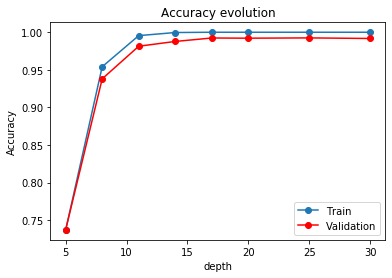

In [0]:
#Illustration des scores en fonction de la profondeur de l'arbre
from pylab import *

plot(max_depths, cv_scores_train, 'o-', label="Train")
plot(max_depths, cv_scores_val, 'ro-', label="Validation")

plt.title("Accuracy evolution")
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.legend(loc="best")


On remarque une stabilité de l'accuracy à la profondeur 17 donc on choisit cette dernière

In [0]:
max_depth_good = 17

In [0]:
#Validation croisée
#Nous faisons 5 folders soit 39209/5 examples par folder 
#pour l'application de la validation croisée

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.2, n_splits=5)

rforest_clf = RandomForestClassifier(n_estimators=150, max_depth=max_depth_good,random_state=0)
scores = cross_val_score(rforest_clf, X, y, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))
print("Cross-validation scores mean:\n{}".format(scores.mean()))


Cross-validation scores:
[0.99132874 0.99196634 0.99030859 0.99107371 0.98992604]
Cross-validation scores mean:
0.9909206834991074


En utilisant la validation croisée moyenne, nous pouvons conclure que nous nous attendons à ce que le modèle soit précis à environ 99% en moyenne. En examinant les cinq scores produits par la validation croisée quintuple, nous pouvons également conclure qu'il existe une variance relativement faible dans la précision entre les plis (98% et 99%).

In [0]:
X_test = df_test.drop(columns = [1568]) #On recupére dans X uniquement les caractéristique des images
y_test = df_test[[1568]]#on recupére dans y les classes des images
y_test = y_test.values.ravel() #Nous faisons un flattens sur le y recupéré

In [0]:
#on prend la meilleure profondeur ici 17 et 
#on construit le modele sur toutes les données de train
#Nombre d'arbre dans la forêt chosit est 150

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=150, max_depth=max_depth_good,random_state=0)
forest_clf.fit(X, y)
cv_scores_train = forest_clf.score(X, y)#Calcul du score sur les données de train
cv_scores_test = forest_clf.score(X_test, y_test) #Calcul du score sur les données de test

print('Accuracy score for train: %.5f: test: %.5f' % (
        cv_scores_train,
        cv_scores_test))

Accuracy score for train: 1.00000: test: 0.96168


In [0]:
#on prend la meilleure profondeur ici 17 et on construit le modele
forest_clf = RandomForestClassifier(n_estimators=150, max_depth=max_depth_good,random_state=0)
forest_clf.fit(X_train, y_train)
cv_scores_train = forest_clf.score(X_train, y_train)
cv_scores_val = forest_clf.score(X_val, y_val)
cv_scores_test = forest_clf.score(X_test, y_test)

print('Accuracy score for train: %.5f: val: %.5f: test: %.5f' % (
        cv_scores_train,
        cv_scores_val,
        cv_scores_test))

Accuracy score for train: 1.00000: val: 0.99235: test: 0.96112


In [0]:
from sklearn.metrics import confusion_matrix

y_test_pred = forest_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix

array([[ 43,   2,   0, ...,   0,   0,   0],
       [  0, 703,  10, ...,   0,   0,   0],
       [  0,   5, 743, ...,   0,   0,   0],
       ...,
       [  0,   2,   1, ...,  78,   0,   0],
       [  0,   0,   0, ...,   0,  40,   0],
       [  0,   0,   1, ...,   0,   3,  84]])

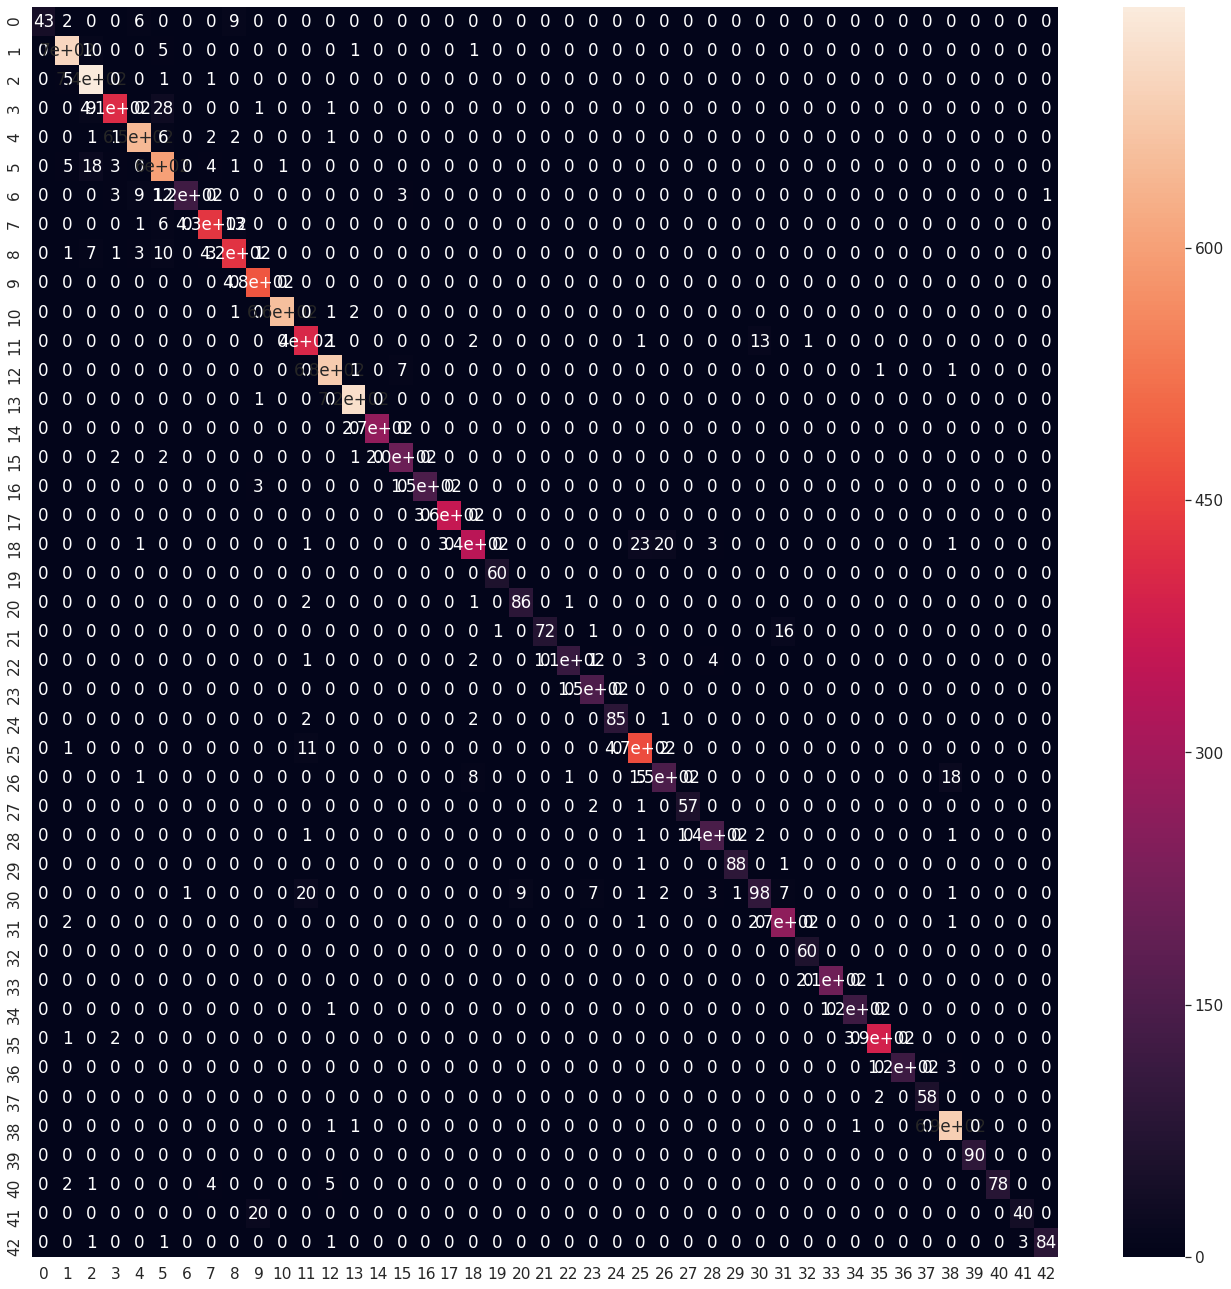

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df_conf_matrix = pd.DataFrame(conf_matrix, range(43), range(43))
plt.figure(figsize=(23,23))# taille de la figure
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_conf_matrix, annot=True) # font size

plt.show()

Cette matrice de confusion est remplie par des valeurs différentes de 0 en dehors de la diagonale, ceci indique que le modèle se trompe très souvent entre les classes. Par exemple nous avons une prediction de la classe 25 au lieu de la classe 18 23fois.

# **Modèle II: SVM (machines à vecteur de support)**

In [0]:
#Nous construisant le modele avec les parametres par defaut de sklearn
#A savoir : C=1.0, kernel='rbf', gamma='scale'

from sklearn import svm

svm_clf = svm.SVC()#instantiation du modele
svm_clf.fit(X_train, y_train)#Entrainement du modele sur les données d'entrainement

cv_scores_train = svm_clf.score(X_train, y_train)
cv_scores_val = svm_clf.score(X_val, y_val)
cv_scores_test = svm_clf.score(X_test, y_test)

print('SVM Accuracy score for train: %.5f: validation: %.5f: test: %.5f' % (
        cv_scores_train,
        cv_scores_val,
        cv_scores_test))

SVM Accuracy score for train: 0.99984: validation: 0.99592: test: 0.95012


In [0]:
#On modifie les paramètre du modele svm pour voir si on peut augmenter l'accuracy
#Pour les raisons de calcul on considère on prend juste 
#quelques valeurs de gama et C qui sont proche des valeurs par défaut

from sklearn import svm

best_score = 0
kenels = ['rbf', 'poly', 'sigmoid', 'precomputed']#Différents kernels de svm
gama_values = [0.1, 1, 10]
c_values    = [0.1, 1, 10]
#Boucle sur les dfférents parametres
for kernel in kernels:
  for gamma in gama_values:
    for C in c_values:
    # Pour chaque combinaison des paramètres, on entraine un SVC
    svm_clf = svm.SVC(C=C, kernel=kernel, gamma=gamma)#instantiation du modele avec le paramètre
    svm_clf.fit(X_train, y_train)
    # On evalue sur les données de validation
    score = svm_clf.score(X_val, y_val)
    # si nous avons un score meilleur, alors on le garde
    if score > best_score:
      best_score = score
      best_parameters = {'C': C, 'kernel': kernel, 'gamma': gamma}


# On reconstruit le modele sur toutes les données avec les bons parametres
# et on evalu sur les données de test
svm_clf = svm.SVC(**best_parameters)
svm_clf.fit(X, y)
test_score = svm_clf.score(X_test, y_test)
print("Best score on validation set: {:.5f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.5f}".format(test_score))


Cette fonction n'a pas pu terminé l'exécution à cause de la durée très grande de l'exécution

Nous continuons pour cela avec les paramètres par défauts

In [0]:
#Validation croisée
#Nous faisons 5 folders soit 39209/5 examples par folder 
#pour l'application de la validation croisée

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.2, n_splits=5)

ksvm_clf = svm.SVC(C=1.0, kernel='rbf', gamma='scale')#instantiation du modele
scores = cross_val_score(ksvm_clf, X, y, cv=shuffle_split)
print("Cross-validation scores for SVM:\n{}".format(scores))
print("Cross-validation scores for SVM mean:\n{}".format(scores.mean()))


Cross-validation scores for SVM:
[0.99604693 0.99604693 0.99566437 0.99642948 0.996557  ]
Cross-validation scores for SVM mean:
0.9961489415965316


In [0]:
#Nous construisant le modele avec les parametres par defaut de sklearn
#A savoir : C=1.0, kernel='rbf', gamma='scale'

from sklearn import svm

svm_clf = svm.SVC(C=1.0, kernel='rbf', gamma='scale')#instantiation du modele
svm_clf.fit(X, y)#Entrainement du modele sur les données d'entrainement

cv_scores_train = svm_clf.score(X, y)
cv_scores_test = svm_clf.score(X_test, y_test)

print('SVM Accuracy score for train: %.5f:  test: %.5f' % (
        cv_scores_train,
        cv_scores_test))

SVM Accuracy score for train: 0.99980:  test: 0.95115


In [0]:
from sklearn.metrics import confusion_matrix

y_test_pred = svm_clf.predict(X_test)#Prédiction des valeurs de test
conf_matrix = confusion_matrix(y_test, y_test_pred)#Génération de la matrice de confusions
conf_matrix

array([[ 46,   8,   0, ...,   0,   0,   0],
       [  0, 703,  11, ...,   0,   0,   0],
       [  0,   4, 737, ...,   0,   0,   0],
       ...,
       [  0,   6,   0, ...,  79,   0,   0],
       [  0,   0,   0, ...,   0,  47,   0],
       [  0,   0,   0, ...,   0,   0,  85]])

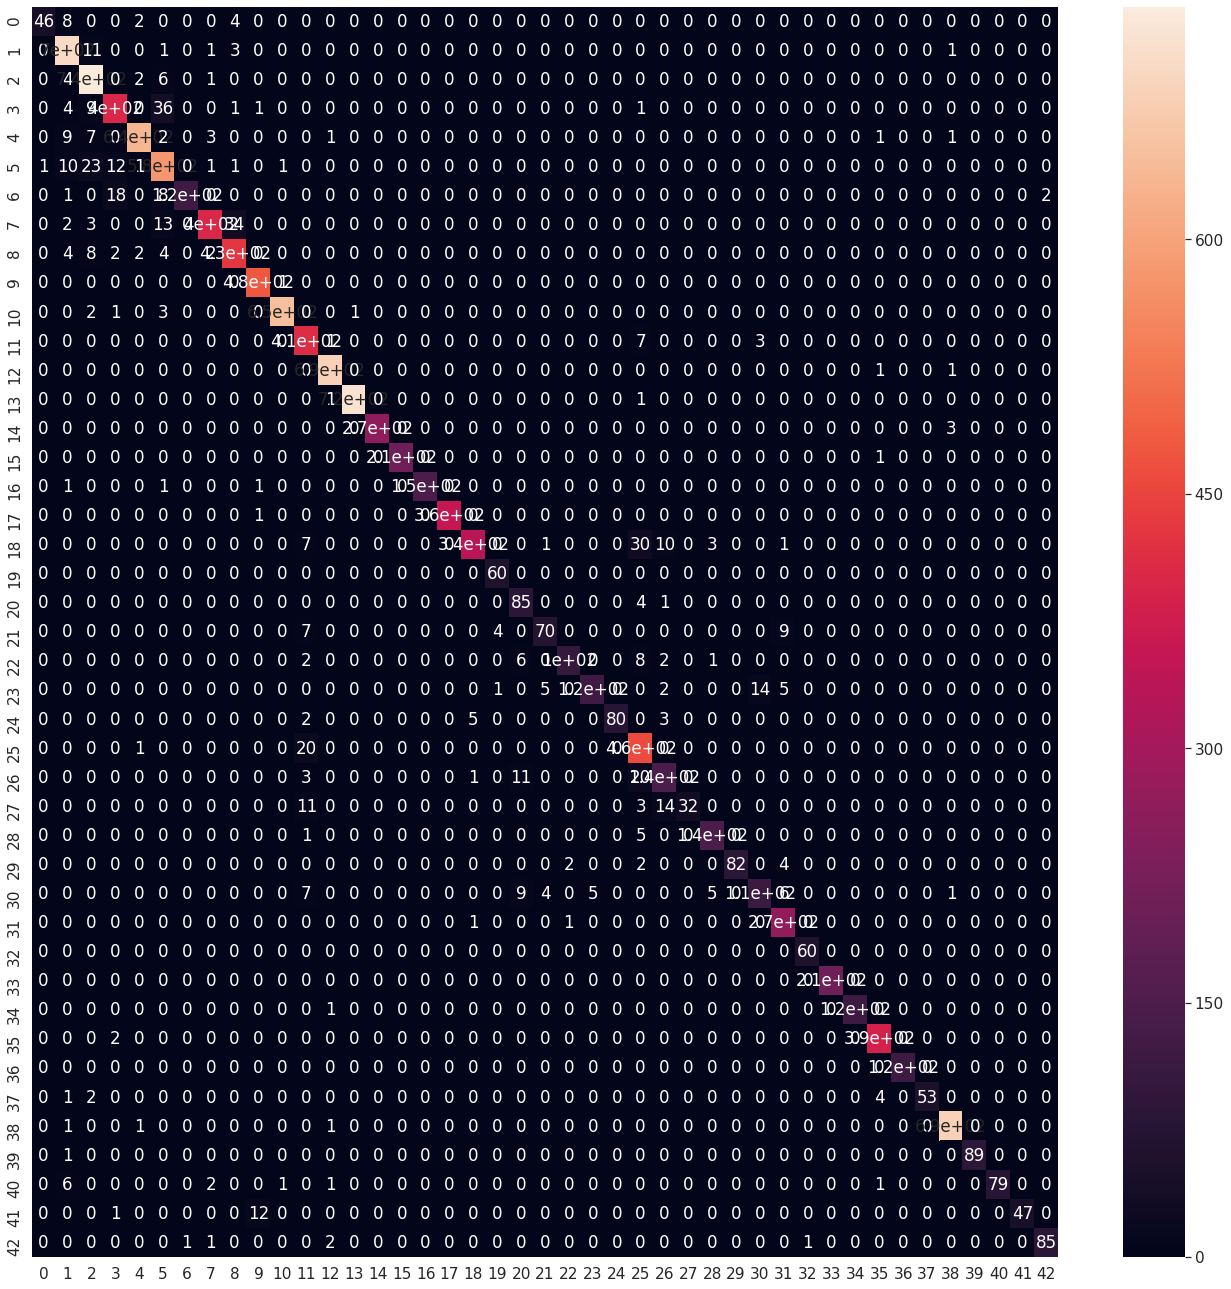

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df_conf_matrix = pd.DataFrame(conf_matrix, range(43), range(43))
plt.figure(figsize=(23,23))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_conf_matrix, annot=True) # font size

plt.show()

Bien qu'elle soit grande, la matrice de confusion ci dessus nous indique : une confusion du modèle illustré par la présence des chiffres non nul en dehors de la diagonale. Le modèle svm a prédit la classe 11 au lieu de la classe 25 20fois et la classe 25 au lieu de la classe 18 30fois.   



# **Modèle III: CNN**

In [0]:

# sample code for reading the traffic sign images and the
# corresponding labels
#
# example:
#            
# trainImages, trainLabels = readTrafficSigns('./DataBase/BaseDApprentissage/Training_Images-avecVeriteTerrain(GT)')
# print len(trainLabels), len(trainImages)
# plt.imshow(trainImages[42])
# plt.show()
#


import matplotlib.pyplot as plt
import csv

# function for reading the images
# arguments: path to the traffic sign data
# returns: list of images, list of corresponding labels 

def readTrafficSigns(rootpath):
    '''Reads traffic sign data 
    Arguments: path to the traffic sign data
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file

        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

In [0]:
file_path = '/Database/BaseDApprentissage/Training_Images-avecVeriteTerrain(GT)'
images, labels = readTrafficSigns(file_path)

In [0]:
print(len(labels))
print(len(images))

39209
39209


In [0]:
#On dump les images et les labels lu pour une utilsation ultérieure
import pickle
with open('drive/My Drive/Colab Notebooks/Datasets/images.lst', 'wb') as handle:
    pickle.dump(images, handle)

with open('drive/My Drive/Colab Notebooks/Datasets/labels.lst', 'wb') as handle:
    pickle.dump(labels, handle)    
print("End Dump")    

End Dump


In [0]:
#Lecture des images de test

images_test = [] # images
labels_test = [] # corresponding labels
# loop over all 42 classes
prefix = '/Database/BaseDeTest/Test_Images/Images/'
gtFile = open('Test_VeriteTerrain(GT).csv') # annotations file
gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file

next(gtReader) # skip header
# loop over all images in current annotations file
for row in gtReader:
    images_test.append(plt.imread(prefix + row[0])) # the 1th column is the filename
    labels_test.append(row[7]) # the 8th column is the label
gtFile.close()

print("End read test images")

End read test images


In [0]:
print(len(labels_test))
print(len(images_test))

12630
12630


In [0]:
import pickle
with open('drive/My Drive/Colab Notebooks/Datasets/images_test.lst', 'wb') as handle:
    pickle.dump(images_test, handle)

with open('drive/My Drive/Colab Notebooks/Datasets/labels_test.lst', 'wb') as handle:
    pickle.dump(labels_test, handle)    
print("End Dump")    

End Dump


In [0]:
#Chargement des donnée dumpé avec pickle
import pickle
with open('drive/My Drive/Colab Notebooks/Datasets/images.lst', 'rb') as handle:
    images = pickle.load(handle)

with open('drive/My Drive/Colab Notebooks/Datasets/labels.lst', 'rb') as handle:
    labels = pickle.load(handle)  

with open('drive/My Drive/Colab Notebooks/Datasets/images_test.lst', 'rb') as handle:
    images_test = pickle.load(handle)

with open('drive/My Drive/Colab Notebooks/Datasets/labels_test.lst', 'rb') as handle:
    labels_test = pickle.load(handle)    

In [0]:
#Les images ont des size différent donc il faut les remettre à la meme size
#Ici nous allons les remettre à une size de 64*64
import cv2

for i in range(len(images)):
  images[i] = cv2.resize(images[i], (64, 64), interpolation = cv2.INTER_LINEAR)
for i in range(len(images_test)):
  images_test[i] = cv2.resize(images_test[i], (64, 64), interpolation = cv2.INTER_LINEAR)  
print("End resize")  

End resize


In [0]:
#importation de librairies
import pandas as pd
import math
import numpy as np
import keras
import seaborn as sns
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
#Transformation de la liste en numpy array 
import numpy as np

input_array = np.stack(images)
input_array_test = np.stack(images_test)

#catégorisation des labels de sorties
train_y = keras.utils.np_utils.to_categorical(labels)
test_y = keras.utils.np_utils.to_categorical(labels_test)


In [0]:
#Nous mélangeons les données
randomize = np.arange(len(input_array))
np.random.shuffle(randomize)
X = input_array[randomize]
y = train_y[randomize]

In [0]:
#Split du dataset en train et validation
split_size = int(X.shape[0]*0.8)
train_x, val_x = X[:split_size], X[split_size:]
train_split_y, val_y = y[:split_size], y[split_size:]

In [0]:
### Construction du model
hidden_num_units = 2048 #
hidden_num_units1 = 1024
hidden_num_units2 = 128
output_num_units = 43 #Nombre de classe d'images

epochs = 15
batch_size = 16
pool_size = (2, 2)

model = Sequential([

 Conv2D(16, (3, 3), activation='relu', input_shape=(64,64,3), padding='same'),
 BatchNormalization(),

 Conv2D(16, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),#
    
 Conv2D(32, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
    
 Conv2D(64, (3, 3), activation='relu', padding='same'),
 BatchNormalization(),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.2),

 Flatten(),

 Dense(units=hidden_num_units, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units1, activation='relu'),
 Dropout(0.3),
 Dense(units=hidden_num_units2, activation='relu'),
 Dropout(0.3),
 Dense(units=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])


In [0]:
#Compilation du modele avec un learning rate de 1e-4
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)       

In [0]:
# Entrainement du modele sur 15 epochs et validation sur les données de validation
model_history = model.fit(train_x.reshape(-1,64,64,3), train_split_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

#Sauvegarde du modèle
import pickle
with open('drive/My Drive/Colab Notebooks/Datasets/model.md', 'wb') as handle:
    pickle.dump(model, handle)

with open('drive/My Drive/Colab Notebooks/Datasets/model_history.hst', 'wb') as handle:
    pickle.dump(model_history, handle)       

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 1016s 32ms/step - loss: 2.2765 - acc: 0.3835 - val_loss: 0.4906 - val_acc: 0.8610
Epoch 2/15
31367/31367 [==============================] - 1016s 32ms/step - loss: 0.5084 - acc: 0.8405 - val_loss: 0.1065 - val_acc: 0.9668
Epoch 3/15
31367/31367 [==============================] - 1033s 33ms/step - loss: 0.2072 - acc: 0.9363 - val_loss: 0.0579 - val_acc: 0.9833
Epoch 4/15
31367/31367 [==============================] - 1016s 32ms/step - loss: 0.1156 - acc: 0.9639 - val_loss: 0.0366 - val_acc: 0.9903
Epoch 5/15
31367/31367 [==============================] - 1021s 33ms/step - loss: 0.0790 - acc: 0.9760 - val_loss: 0.0257 - val_acc: 0.9931
Epoch 6/15
31367/31367 [==============================] - 1018s 32ms/step - loss: 0.0569 - acc: 0.9830 - val_loss: 0.0194 - val_acc: 0.9946
Epoch 7/15
31367/31367 [==============================] - 1013s 32ms/step - loss: 0.0411 - acc: 0.9872 - val_lo

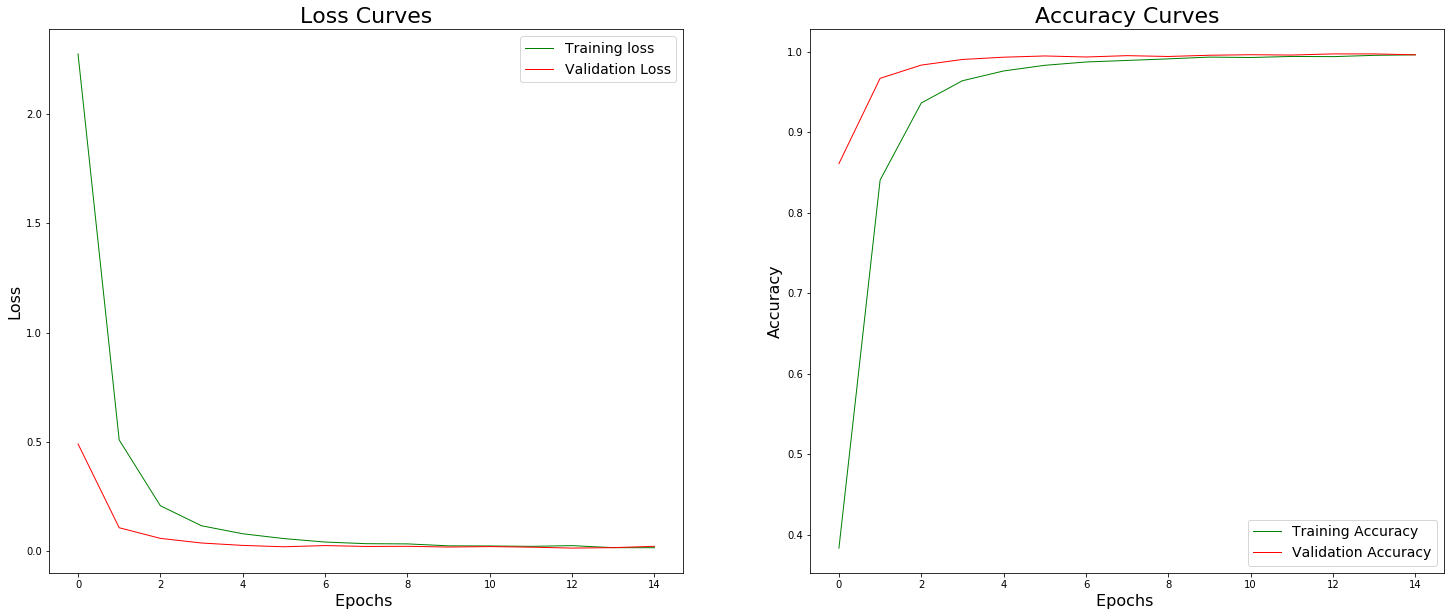

In [0]:
#Visualisation de l'historique de l'accuracy et de la fonction de perte
#en fonction  des epochs

import matplotlib.pyplot as plt

# Loss Curves
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'],'-g',linewidth=1.0)
plt.plot(model_history.history['val_loss'],'r',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=22)
 
# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(model_history.history['acc'],'-g',linewidth=1.0)
plt.plot(model_history.history['val_acc'],'r',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=22)
plt.show()

In [0]:
### Prdicting the class
pred = model.predict_classes(input_array_test)
pred

array([16,  1, 38, ...,  5,  7, 10])

In [0]:
pred.shape

(12630,)

In [0]:
### Nous évaluons ensuite notre modèle sur les données de test
cnn_score = model.evaluate(input_array_test, test_y)
print("Test Loss: ", cnn_score[0])
print("Test Accuracy: ", cnn_score[1])


12630/12630 [==============================] - 73s 6ms/step
Test Loss:  0.15727638542512687
Test Accuracy:  0.9711797308185605


In [0]:
#Génération de la matrice de confusion du modèle CNN

from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(input_array_test)

y_test_true = np.array(labels_test, dtype=np.int) #convertion des labels true en numpy array

conf_matrix = confusion_matrix(y_test_true, y_test_pred)
conf_matrix

array([[ 58,   0,   0, ...,   0,   0,   0],
       [  0, 705,   8, ...,   0,   0,   0],
       [  0,   1, 747, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ...,  78,   0,   0],
       [  0,   0,   0, ...,   0,  52,   0],
       [  0,   0,   0, ...,   0,   0,  90]])

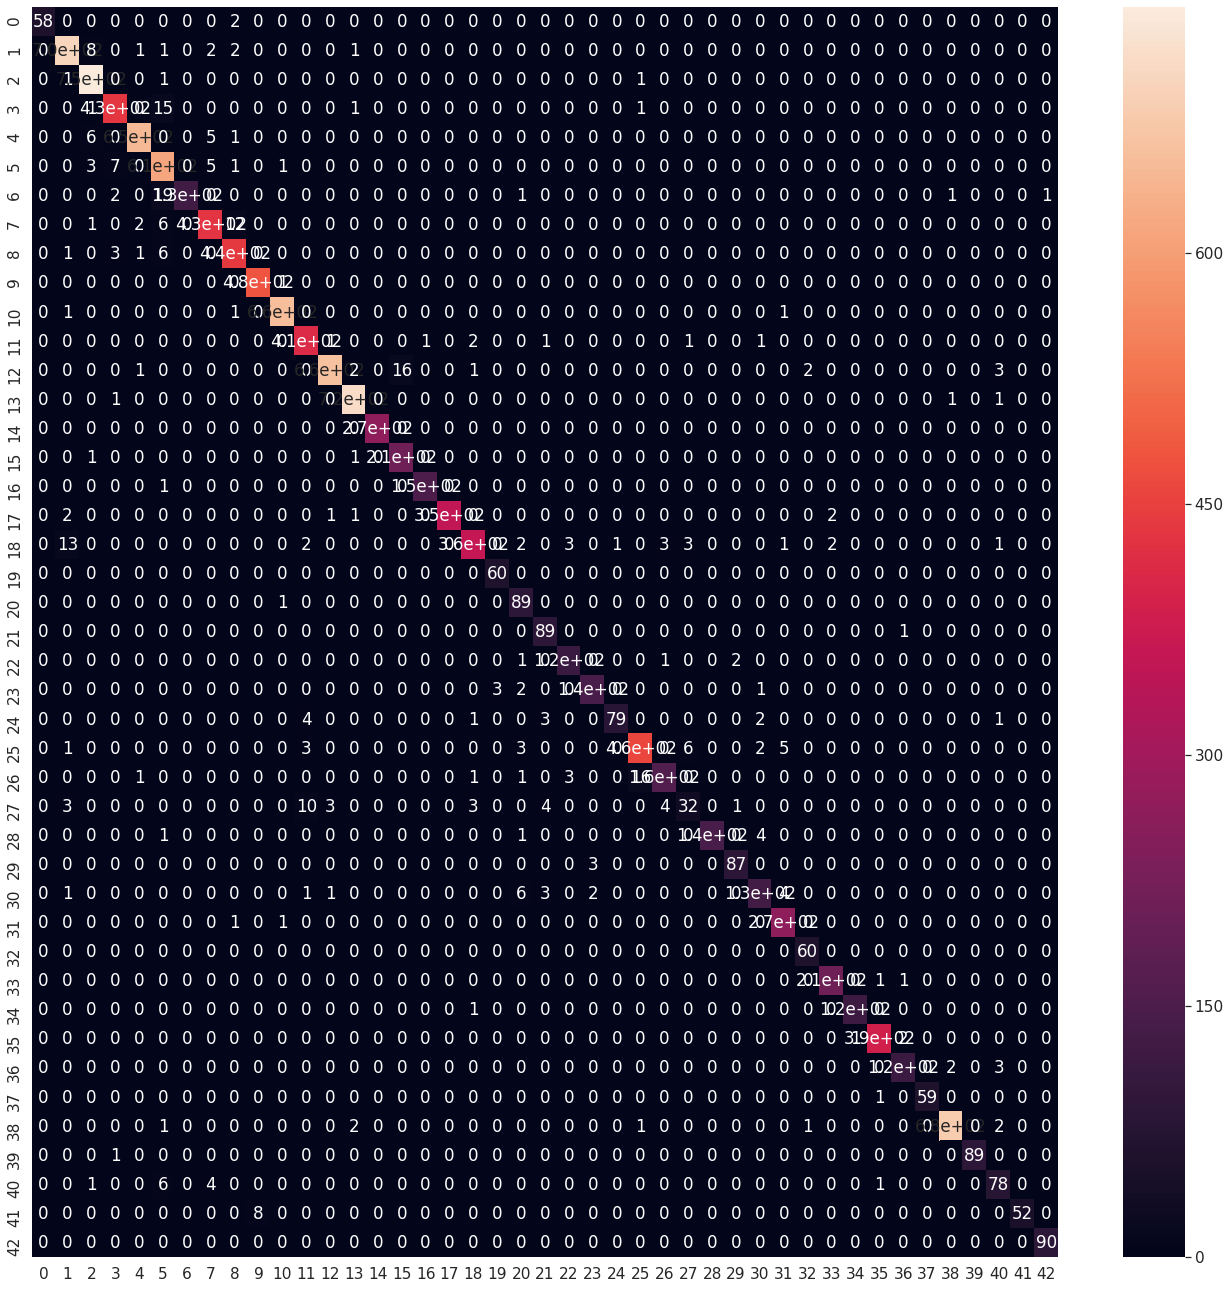

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df_conf_matrix = pd.DataFrame(conf_matrix, range(43), range(43))
plt.figure(figsize=(23,23))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_conf_matrix, annot=True) # font size

plt.show()

Cette matrice de confusion est plus remplie par des 0 en dehors de la diagonale. Ce qui montre que le modèle se trompe très faiblement entre les classe et donc la qualité du modèle. La plus grande confusion de ce modèle est la classe 1&18 (13fois). En effet le modèle a prédit 13 fois la classe 2 au lieu de la classe 18

In [0]:
#End